# Análise exploratória de dados Pub Med e Tweet Covid19

## Instalação dos pacotes necessários para EDA

In [ ]:
# Executar esse bloco caso não tenha o pacote instalado
# install.packages("tidyverse")
# install.packages("magrittr")
# install.packages("tm")
# install.packages("wordcloud")

## Carregando os pacotes

In [1]:
library(wordcloud)
library(magrittr)
library(tm)
library(tidyverse)
library(tidyr)
library(cluster)

Loading required package: RColorBrewer

Loading required package: NLP

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ ggplot2::annotate() masks NLP::annotate()
✖ tidyr::extract()    masks magrittr::extract()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()
✖ purrr::set_names()  masks magrittr::set_names()



## Leitura dos dados Pub Med

In [ ]:
# Leitura do arquivo por linha
covid <- readLines("PM-COVID-4064-TM.txt")

In [ ]:
# Leitura do arquivo por DF
covid_df <- read.delim("PM-COVID-4064-TM.txt", header = FALSE, sep = "\n")
covid_df$doc_id <- seq.int(nrow(covid_df))
covid_df <- covid_df[,c(2,1)]
colnames(covid_df) <- c("doc_id", "text")

In [ ]:
covid_source <- VectorSource(covid)
coviddf_source <- DataframeSource(covid_df)

In [ ]:
covid_corpus <- VCorpus(covid_source)
coviddf_corpus <- VCorpus(coviddf_source)

In [ ]:
print(covid_corpus)
print(coviddf_corpus)
covid_corpus[[1]]
covid_corpus[[1]]$content

## Limpeza dos dados Pub Med

In [ ]:
# Lista de stopwords en, pt e es
stopwords("en"); stopwords("pt"); stopwords("es")

In [2]:
new_stops <- c("COVID", "the", "The", stopwords("en"))

## Aplicando a limpeza e normalização dos dados em toda base Pub Med

In [ ]:
covid_clean <- tm_map(covid_corpus, removeWords, words = c(new_stops))
covid_clean <- tm_map(covid_clean, removePunctuation)
covid_clean[[1]]$content
covid_clean <- tm_map(covid_clean, stripWhitespace)

## Frequência dos Termos Pub Med 

In [ ]:
covid_dtm <- DocumentTermMatrix(covid_clean)
covid_dtm
covid_m1 <- as.matrix(covid_dtm)

In [ ]:
covid_tdm <- TermDocumentMatrix(covid_clean)
covid_tdm
covid_m2 <- as.matrix(covid_tdm)

In [ ]:
covid_m1[1:10, 1000:1010]
covid_m2[1000:1010, 1:10]

In [ ]:
term_frequency_covid <- rowSums(covid_m2)
term_frequency_covid <- sort(term_frequency_covid, decreasing = TRUE)
head(term_frequency_covid, 100) 
term_frequency_covid[100:200]

## Visualização de Dados Pub Med

In [ ]:
term <- names(term_frequency_covid)
num <- term_frequency_covid
word_freqs <- data.frame(term, num)
wordcloud(word_freqs$term, word_freqs$num, max.words = 100, colors = "red")

In [ ]:
freq <- sort(colSums(as.matrix(covid_dtm)), decreasing=TRUE)   
barplot(freq[1:10],col="lightgreen",las=2)

In [ ]:
dtmss <- removeSparseTerms(covid_dtm, 0.80)   
dtmss   
d <- dist(t(dtmss), method="euclidian")   
fit <- hclust(d=d, method="complete")
fit 
plot(fit, hang=1) 
groups <- cutree(fit, k=6)   
rect.hclust(fit, k=6, border="red")

In [ ]:
d <- dist(t(dtmss), method="euclidian")   
kfit <- kmeans(d, 2)   
clusplot(as.matrix(d), kfit$cluster, color=T, shade=T, labels=2, lines=0)

In [ ]:
set.seed(1234)
wordcloud(words = word_freqs$term, freq = word_freqs$num, min.freq = 1,
          max.words=200, random.order=FALSE, rot.per=0.35, 
          colors=brewer.pal(8, "Dark2"))

## Leitura dos dados Tweet Covid19

In [3]:
tweets_covid <-read_csv('covid19_tweets.csv')

Parsed with column specification:
cols(
  user_name = col_character(),
  user_location = col_character(),
  user_description = col_character(),
  user_created = col_datetime(format = ""),
  user_followers = col_double(),
  user_friends = col_double(),
  user_favourites = col_double(),
  user_verified = col_logical(),
  date = col_datetime(format = ""),
  text = col_character(),
  hashtags = col_character(),
  source = col_character(),
  is_retweet = col_logical()
)



In [4]:
glimpse(tweets_covid)

Rows: 179,108
Columns: 13
$ user_name        <chr> "ᏉᎥ☻լꂅϮ", "Tom Basile 🇺🇸", "Time4fisticuffs", "ethel…
$ user_location    <chr> "astroworld", "New York, NY", "Pewee Valley, KY", "S…
$ user_description <chr> "wednesday addams as a disney princess keepin it [̲̅…
$ user_created     <dttm> 2017-05-26 05:46:42, 2009-04-16 20:06:23, 2009-02-2…
$ user_followers   <dbl> 624, 2253, 9275, 197, 101009, 1180, 79956, 608, 25, …
$ user_friends     <dbl> 950, 1677, 9525, 987, 168, 1071, 54810, 355, 29, 342…
$ user_favourites  <dbl> 18775, 24, 7254, 1488, 101, 1287, 3801, 95, 18, 2980…
$ user_verified    <lgl> FALSE, TRUE, FALSE, FALSE, FALSE, FALSE, FALSE, FALS…
$ date             <dttm> 2020-07-25 12:27:21, 2020-07-25 12:27:17, 2020-07-2…
$ text             <chr> "If I smelled the scent of hand sanitizers today on …
$ hashtags         <chr> NA, NA, "['COVID19']", "['COVID19']", "['CoronaVirus…
$ source           <chr> "Twitter for iPhone", "Twitter for Android", "Twitte…
$ is_retweet       <lgl> F

In [5]:
tweets_covid<-tweets_covid %>%select(c(user_location, date, text, source))

In [7]:
tweets_covid%>%head(5)

user_location       date               
1 astroworld          2020-07-25 12:27:21
2 New York, NY        2020-07-25 12:27:17
3 Pewee Valley, KY    2020-07-25 12:27:14
4 Stuck in the Middle 2020-07-25 12:27:10
5 Jammu and Kashmir   2020-07-25 12:27:08
  text                                                                                                                                        
1 If I smelled the scent of hand sanitizers today on someone in the past, I would think they were so intoxicated that… https://t.co/QZvYbrOgb0
2 Hey @Yankees @YankeesPR and @MLB - wouldn't it have made more sense to have the players pay their respects to the A… https://t.co/1QvW0zgyPu
3 @diane3443 @wdunlap @realDonaldTrump Trump never once claimed #COVID19 was a hoax. We all claim that this effort to… https://t.co/Jkk8vHWHb3
4 @brookbanktv The one gift #COVID19 has give me is an appreciation for the simple things that were always around me… https://t.co/Z0pOAlFXcW 
5 25 July : Media Bulletin on Novel #CoronaVirusUpdates #COVID19 \n@kansalrohit69 @DrSyedSehrish @airnewsalerts @ANI… https://t.co/MN0EEcsJHh 
  source             
1 Twitter for iPhone 
2 Twitter for Android
3 Twitter for Android
4 Twitter for iPhone 
5 Twitter for Android

In [8]:
tweets_covid%>%tail(5)

user_location              date               
1 Ilorin, Nigeria            2020-08-29 19:44:21
2 Ontario                    2020-08-29 19:44:16
3 🇨🇦 Canada                  2020-08-29 19:44:15
4 New York City              2020-08-29 19:44:14
5 Aliwal North, South Africa 2020-08-29 19:44:08
  text                                                                                                                                              
1 Thanks @IamOhmai for nominating me for the @WHO #WearAMask challenge.\n\nI nominate @abdlbaasit_ @hvbxxb,… https://t.co/IegQDkKudT                
2 2020! The year of insanity! Lol! #COVID19 https://t.co/y48NP0yzgn                                                                                 
3 @CTVNews A powerful painting by Juan Lucena. It's a tribute to the grandparents who died of COVID 19 and the grandc… https://t.co/wnXbbyoCe2      
4 More than 1,200 students test positive for #COVID19 at major university - ABC News https://t.co/6aNhSiF5gh                                        
5 I stop when I see a Stop\n\n@SABCNews\n@IzindabaNews24\n@dailysunsa\n@eNCA\n@AliwalNorth\n@Ambitiouz_Ent\n@Official_SABC1… https://t.co/ReG8pwZoN7
  source             
1 Twitter for Android
2 Twitter for Android
3 Twitter Web App    
4 Twitter for iPhone 
5 Twitter for Android

In [9]:
tweets_covid<-head(tweets_covid,10000)

In [10]:
# definindo a fonte texto tweets
tweets_covid_source <- VectorSource(tweets_covid$text)
# transformando em corpus texto tweets
tweets_covid_corpus <- VCorpus(tweets_covid_source)

In [11]:
print(tweets_covid_corpus)
tweets_covid_corpus[[1]]
tweets_covid_corpus[[1]]$content

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 10000


<<PlainTextDocument>>
Metadata:  7
Content:  chars: 140

[1] "If I smelled the scent of hand sanitizers today on someone in the past, I would think they were so intoxicated that… https://t.co/QZvYbrOgb0"

## Aplicando a limpeza e normalização dos dados em toda base Pub Med

In [12]:
remover_https_url <-function(texto)gsub("https.*","",  texto)
remover_http_url <-function(texto)gsub("http.*","",  texto)
remover_barra <-function(texto)gsub("/", "", texto)
remover_barras <-function(texto)gsub("\\|", "", texto)
remover_arroba <-function(texto)gsub("@", "", texto)
tweets_covid_corpus <-tm_map(tweets_covid_corpus, content_transformer(remover_https_url))
tweets_covid_corpus <-tm_map(tweets_covid_corpus, content_transformer(remover_http_url))
tweets_covid_corpus <-tm_map(tweets_covid_corpus, content_transformer(remover_barra))
tweets_covid_corpus <-tm_map(tweets_covid_corpus, content_transformer(remover_barras))
tweets_covid_corpus <-tm_map(tweets_covid_corpus, content_transformer(remover_arroba))                                                        
tweets_covid_corpus <-tm_map(tweets_covid_corpus, content_transformer(removePunctuation))
tweets_covid_corpus <-tm_map(tweets_covid_corpus, content_transformer(removeNumbers))
tweets_covid_corpus <-tm_map(tweets_covid_corpus, removeWords, words = c(new_stops))
tweets_covid_corpus <-tm_map(tweets_covid_corpus, content_transformer(stripWhitespace))
tweets_covid_corpus[[1]]$content

[1] "If I smelled scent hand sanitizers today someone past I think intoxicated … "

In [13]:
tweet_covid_dtm <- DocumentTermMatrix(tweets_covid_corpus)
tweet_covid_dtm
tweet_covid_m1 <- as.matrix(tweet_covid_dtm)

<<DocumentTermMatrix (documents: 10000, terms: 22058)>>
Non-/sparse entries: 95603/220484397
Sparsity           : 100%
Maximal term length: 58
Weighting          : term frequency (tf)

In [14]:
tweet_covid_tdm <- TermDocumentMatrix(tweets_covid_corpus)
tweet_covid_tdm
tweet_covid_m2 <- as.matrix(tweet_covid_tdm)

<<TermDocumentMatrix (terms: 22058, documents: 10000)>>
Non-/sparse entries: 95603/220484397
Sparsity           : 100%
Maximal term length: 58
Weighting          : term frequency (tf)

In [15]:
tweet_covid_m1[1:10, 1000:1010]
tweet_covid_m2[1000:1010, 1:10]

Terms
Docs agenda agenormalized agent agentphil agents agerelated ages aggravate
  1  0      0             0     0         0      0          0    0        
  2  0      0             0     0         0      0          0    0        
  3  0      0             0     0         0      0          0    0        
  4  0      0             0     0         0      0          0    0        
  5  0      0             0     0         0      0          0    0        
  6  0      0             0     0         0      0          0    0        
  7  0      0             0     0         0      0          0    0        
  8  0      0             0     0         0      0          0    0        
  9  0      0             0     0         0      0          0    0        
  10 0      0             0     0         0      0          0    0        
    Terms
Docs aggression aggressively aggressively…
  1  0          0            0            
  2  0          0            0            
  3  0          0            0            
  4  0          0            0            
  5  0          0            0            
  6  0          0            0            
  7  0          0            0            
  8  0          0            0            
  9  0          0            0            
  10 0          0            0

Docs
Terms           1 2 3 4 5 6 7 8 9 10
  agenda        0 0 0 0 0 0 0 0 0 0 
  agenormalized 0 0 0 0 0 0 0 0 0 0 
  agent         0 0 0 0 0 0 0 0 0 0 
  agentphil     0 0 0 0 0 0 0 0 0 0 
  agents        0 0 0 0 0 0 0 0 0 0 
  agerelated    0 0 0 0 0 0 0 0 0 0 
  ages          0 0 0 0 0 0 0 0 0 0 
  aggravate     0 0 0 0 0 0 0 0 0 0 
  aggression    0 0 0 0 0 0 0 0 0 0 
  aggressively  0 0 0 0 0 0 0 0 0 0 
  aggressively… 0 0 0 0 0 0 0 0 0 0

In [17]:
term_frequency_tweet_covid <- rowSums(tweet_covid_m2)
term_frequency_tweet_covid <- sort(term_frequency_tweet_covid, decreasing = TRUE)
head(term_frequency_tweet_covid, 100) 
term_frequency_tweet_covid[100:200]

covid           cases             new     coronavirus             amp 
           1438            1225             836             793             595 
         people            will        positive        pandemic             can 
            488             484             466             369             364 
            now          deaths          health            help           total 
            327             318             316             288             278 
            get             one            just            july            this 
            268             264             261             260             257 
           mask           today           daily            even             day 
            235             234             227             220             216 
         spread           tests        lockdown            need            risk 
            214             213             212             211             209 
           like          tested           masks          number            time 
            207             195             192             182             182 
          india        patients            many        symptoms      government 
            177             176             173             172             171 
          first             how        reported           world            last 
            170             165             164             164             158 
           back            good            know           virus            dont 
            153             151             148             148             147 
         please             you           still          update            wear 
            144             144             142             142             140 
        country            days            news             see            slow 
            139             139             138             135             134 
           take            says             due            face realdonaldtrump 
            134             133             132             131             131 
      confirmed         vaccine            care        identify        minister 
            129             129             128             127             127 
        testing        hospital            what            home            well 
            127             125             125             124             124 
           work          corona           death          global         pradesh 
            123             122             122             122             121 
          going            read            want          sooner           state 
            120             120             119             118             118 
           test   selfreporting            safe         reports             may 
            118             117             116             115             114 
            for           since            make           chief          madhya 
            113             113             111             109             109 
         social            stay           don’t             its          latest 
            106             106             105             105             104

latest               trump              public              crisis 
                104                 104                 103                 102 
               keep                 why                life             support 
                102                 101                 100                 100 
              hours                 not                 our                with 
                 99                  99                  99                  98 
              fight                case                data               great 
                 96                  95                  95                  95 
               said             another                 who               think 
                 95                  94                  94                  92 
               rise                year              active                best 
                 91                  91                  90                  90 
               free             million              police               check 
                 90                  90                  90                  89 
          recovered                 way              around                also 
                 89                  89                  88                  87 
           recovery      chouhanshivraj               every                 per 
                 87                  86                  86                  86 
              right               singh                live              across 
                 86                  86                  85                  84 
                and                high                more                rate 
                 84                  84                  84                  84 
          situation                much                 but            everyone 
                 84                  83                  82                  82 
           business            children                must              taking 
                 81                  81                  79                  79 
          countries            response             shivraj                week 
                 78                  78                  78                  78 
            wearing                your              report               there 
                 77                  77                  76                  76 
             impact              months shivrajsinghchouhan              states 
                 75                  74                  74                  74 
              video                love              school                 are 
                 74                  73                  72                  71 
             better             chouhan            saturday             weekend 
                 71                  71                  71                  71 
              blood                look              really                they 
                 70                  70                  70                  70 
            workers            continue              family                kids 
                 70                  69                  69                  69 
           students                when                amid                 man 
                 69                  69                  68                  68 
               died              follow               local          recoveries 
                 67                  67                  67                  67 
               stop                 gmt                long              plasma 
                 67                  66                  66                  66 
             record            breaking coronaviruspandemic                join 
                 66                  65                  65                  65 
               next                 two             working             protect 
                 65                  65     

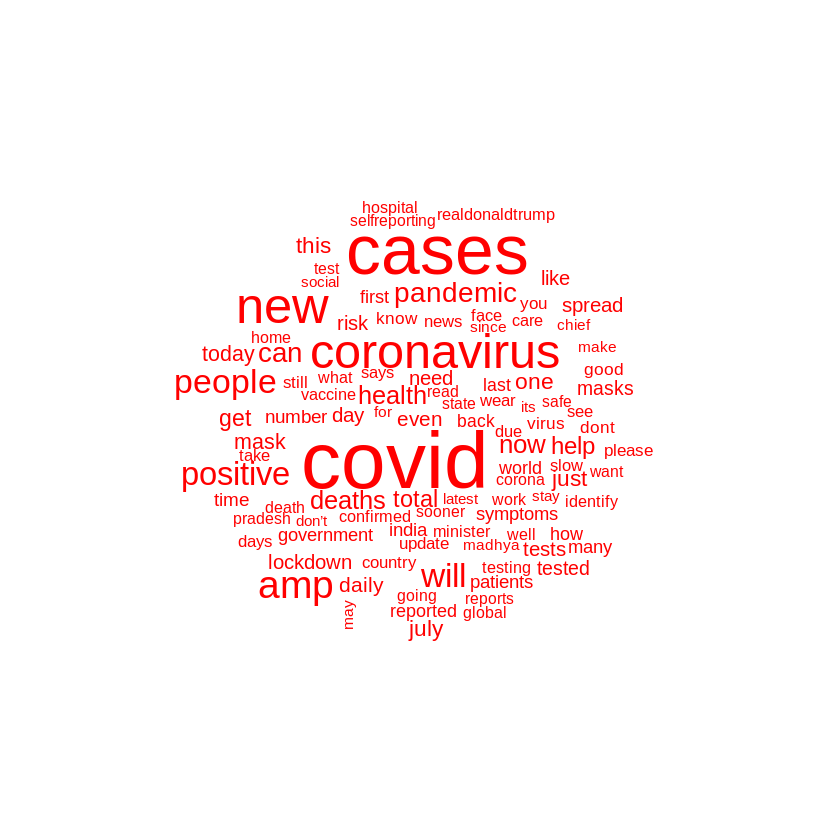

In [18]:
term <- names(term_frequency_tweet_covid)
num <- term_frequency_tweet_covid
word_freqs <- data.frame(term, num)
wordcloud(word_freqs$term, word_freqs$num, max.words = 100, colors = "red")

In [ ]:
freq <- sort(colSums(as.matrix(covid_dtm)), decreasing=TRUE)   
barplot(freq[1:10],col="lightgreen",las=2)

In [ ]:
dtmss <- removeSparseTerms(covid_dtm, 0.80)   
dtmss   
d <- dist(t(dtmss), method="euclidian")   
fit <- hclust(d=d, method="complete")
fit 
plot(fit, hang=1) 
groups <- cutree(fit, k=6)   
rect.hclust(fit, k=6, border="red")

In [ ]:
d <- dist(t(dtmss), method="euclidian")   
kfit <- kmeans(d, 2)   
clusplot(as.matrix(d), kfit$cluster, color=T, shade=T, labels=2, lines=0)

In [ ]:
set.seed(1234)
wordcloud(words = word_freqs$term, freq = word_freqs$num, min.freq = 1,
          max.words=200, random.order=FALSE, rot.per=0.35, 
          colors=brewer.pal(8, "Dark2"))